<a href="https://colab.research.google.com/github/liofval/GCI/blob/main/GCI%E3%83%99%E3%83%BC%E3%82%B7%E3%83%83%E3%82%AF_%E6%BC%94%E7%BF%92_%E5%88%86%E9%A1%9E%E3%82%B3%E3%83%BC%E3%82%B9_%E3%83%AC%E3%83%99%E3%83%AB%EF%BC%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **分類コース**


---


分類コースでは、**データのカテゴリーを予測する機械学習モデル「決定木」**を取り扱い、**「データの理解→データの前処理→モデルの構築・評価」**という一連の流れを通して、各レベルに応じてデータ分析に必要な知識の習得を目指します。

#レベル０（☆☆☆☆☆）


---


レベル０では、本コースで扱う決定木について紹介します。そして、データの特徴や簡単な前処理方法について学びます。

##0.1.機械学習モデル「決定木」

**決定木（Decision Tree）**は、データの特徴量を利用して条件分岐を繰り返し、データの特徴とラベルの関係を学習する手法です。主に、**ラベルの分類タスクで利用**されます。

例えば、下記のような毒キノコに関する表データがあったとします。ここで、キノコの形態的特徴から有毒か無毒かを判別することが目的であれば、表のうち毒の有無（Yes/ No）に関する列がラベルに相当し、キノコの柄の高さ（height）や幅（width）に関する列の情報が特徴量となります。なお、IDは、毒（poison）の有無と無関係に割り当てられた数字であるため、特徴量には含まれません。

| ID  | height(cm) | width(cm)|poison(Yes/No)|
|-----|----------|----------|---|
| 001 | 5        | 4        |N |
| 002 | 3        | 2        |N|
| 003 | 6        | 2        |Y|
| 004 | 2        | 1        |N|
| 005 | 5        | 1        |Y|

特徴量の長さが4cm以下かどうかの条件で上記の表データを分けると以下のようになります。

**【高さ4cm以下であるキノコ】 ⇒ グループ1（無毒キノコのみ）**

| ID  | height | width|poison|
|-----|----------|----------|---|
| 002 | 3        | 2        |N|
| 004 | 2        | 1        |N|

**【高さ4cm以下でないキノコ】 ⇒ グループ2（有毒キノコと無毒キノコを含む）**

| ID  | height| width|poison|
|-----|----------|----------|---|
| 001 | 5        | 4        |N |
| 003 | 6        | 2        |Y|
| 005 | 5        | 1        |Y|

結果、高さ4cm以下のデータは無毒キノコと分類できました。しかし、高さが4cm以下でないデータには、有毒と無毒キノコが混ざっています。そこで、次に、高さ4cm以下でないデータのうち、幅が3cm以下かどうかの条件で分けると以下のようになります。

**【高さ4cm以下でなく、幅3cm以下であるキノコ】 ⇒ グループ2-1（有毒キノコのみ）**

| ID  | height | width|poison|
|-----|----------|----------|---|
| 003 | 6        | 2        |Y|
| 005 | 5        | 1        |Y|

**【高さ4cm以下でなく、幅3cm以下でないキノコ】 ⇒ グループ2-2（無毒キノコのみ）**

| ID  | height | width|poison|
|-----|----------|----------|---|
| 001 | 5        | 4        |N|

このように条件分岐を繰り返すことで無毒と有毒キノコを分類できます。

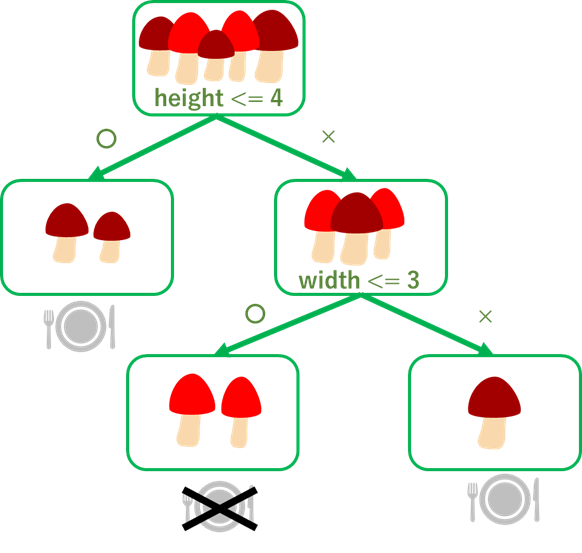

決定した分岐条件を使用すれば、ここにない**未知のデータであっても毒を持つキノコか予測できます**。例えば、あるキノコの柄の高さが5cmで、柄の幅が2cmだった場合、分岐条件からグループ2-1の有毒キノコだと予想できます。

これぐらいの数であれば、データを見ながら分類条件を人の手で決定できますが、データが1千、1万、10万と増え、さらに特徴量の数も増えると人の手で決定するのは大変です。そこで**機械（コンピュータ）にデータを渡して自動で分岐条件を学習するのが決定木**という機械学習手法です。

##0.2.データの理解

データの理解で重要なデータの種類について学んでいきましょう。


さきほどの表データうち、高さや幅などの特徴を表すデータを特徴量と呼びました。特徴量は、**量的データと質的データ**に分けられます。量的データは、さきほどの高さや幅などの連続値で表現できるデータです。一方、質的データは、柄が高いか低いか、柄の幅が広いか狭いか、キノコの斑点(bruises)や匂い(odor)の有無といったカテゴリーを表すデータです。必ずしも2つに分類されるわけではなく、匂いの種類やキノコの色のような3つ以上のカテゴリーもあります。質的データを特徴量に持つ、毒キノコのデータには、以下の表のような例が挙げられます。

| ID  | bruises | odor |poison|
|-----|------|------|--|
| 001 | Y | N   |N|
| 002 | N | Y   |N|
| 003 | Y | Y   |Y|
| 004 | N | Y   |N|

このようなデータであっても斑点や匂いの有無で条件分岐が可能です。しかし、コンピュータは、特徴量がある数値以上かのように分岐条件を決定するため、あらかじめ表データにある質的データの文字をコンピュータで扱いやすいように数値化する前処理が必要です。この前処理を**ダミー変数化**と言います。例えば、斑点と匂いの有無を1と0になるよう上の表データをダミー変数化すると、次のようになります。


| ID  | bruises | odor |poison|
|-----|------|------|--|
| 001 | 1 | 0   |N|
| 002 | 0 | 1   |N|
| 003 | 1 | 1   |Y|
| 004 | 0 | 1   |N|


ダミー変数化より、質的データであっても量的データのときのように、斑点が0.5以上かどうかや匂いが0.5以上かどうかを基準に、コンピュータが毒キノコの分類条件を決定できます。

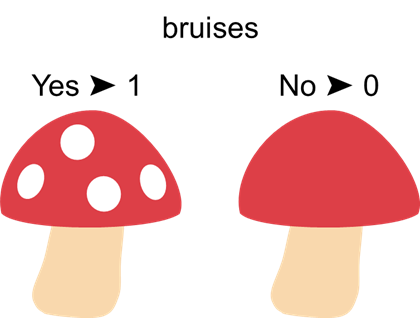

##0.3.データの前処理

データの前処理や機械学習モデル構築は、pandasやscikit-learnなどの便利なライブラリ（コードをまとめたもの）を活用して、簡単に実装できます。そのため、自身でプログラムするコストを最小限にしてデータ分析が可能です。コードセルにて、ライブラリ名の前にスペースを空けて`import`と記載すると、ライブラリを取り込んで（インポート）して使用できるようになります。

それでは、**表データを管理できるライブラリpandas**をインポートしてみましょう。`import pandas`と下のコードセルに入力するだけで、pandasライブラリを使用できますが、Pythonでは、`import ライブラリ名 as 省略名`と記載すると、ライブラリ名を省略・変更して使用できます。pandasは、pdと省略するのが慣習となっています。下記のコードを実行してみましょう。下のコードセルをクリックし、コード左の▶ボタンでセルの実行ができます（下図参照）。

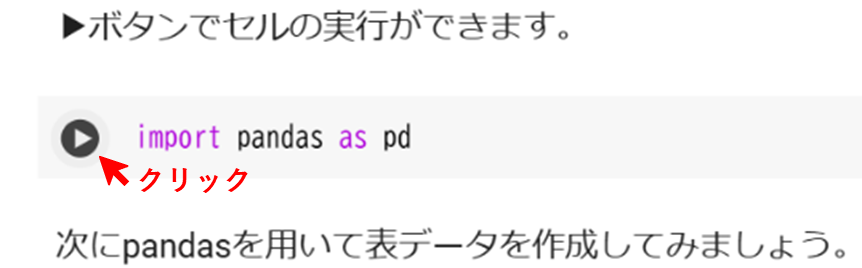

In [ ]:
import pandas as pd

次にpandasを用いて表データを作成してみましょう。表データを作成するには、pandasのDataFrameクラスを使用します。ライブラリ内のクラスを使用する際に、必ず`pd.クラス名`のように記載する必要があります。また、クラスからオブジェクトを生成（インスタンス化）するためには、クラス名とかっこを記載します。かっこ内には、クラスごとに必要な値（引数）を渡します。今回は、2次元のリストとしてデータを渡します。文字列は、シングルクオーテーション`''`で挟む必要があるため、忘れないように気を付けましょう。今回は、先ほどの表の特徴量にあたる質的データを作成し、ダミー変数化を実践してみましょう。

>**[pandasの表の作成]**
>
>```Python
>変数名 = pd.DataFrame(2次元リスト)
>```



In [ ]:
df = pd.DataFrame([['Y', 'N'],['N','Y'],['Y', 'Y'], ['N', 'Y']])
df

DataFrameでは、データを行と列で管理します。縦方向に並んだ表の左側の行番号はindex（インデックス）、横方向に並ぶ表の上の列名はcolumns（カラム）で管理しており、デフォルトでは、0からの連番が割り振られています。そのため、これまで見た表のように表の一番上に列の種類が入っていません。インスタンス時の`columns`引数にカラム名をリストにして`columns = [列名1,列名2]`と代入することで、カラム名を指定できます。カラム名を文字列にしたい場合は、シングルクオーテーションが必要です。

In [ ]:
df = pd.DataFrame([['Y', 'N'],['N','Y'],['Y', 'Y'], ['N', 'Y']], columns=['bruises', 'odor'])
df

これで斑点や匂いの有無に関するデータの準備ができました。現状YesとNoとなっているのでデータの種類で解説したダミー変数化をしてみましょう。ダミー変数化にはpandasのget_dummies関数を使用します。関数のかっこ内にデータフレームを入れるとその表データがダミー変数化され、返り値として得られます。

In [ ]:
df2 = pd.get_dummies(df)
df2

カラムが4列となってしまいました。また、数値（0と1）ではなく論理値（TrueとFalse）が割り当てられてしまいました。これはYesかどうかでFalseかTrue、NoかどうかでFalseかTrueを割り振っているためです。しかし、YesのTrueとNoのFalseは同じことを意味し、重複しています。`get_dummies`関数の`drop_first`引数にTrueを渡すことで、先頭のNoを削除し、重複を減らせます。また、データが数字の0と1ではなくTrueとFalseとなっていますが、Trueは1をFalseは0を表しているため、このままでも分析できます。もし、データ型（data type）も変更したい場合は、`dtype`引数にint型（整数型）を指定すれば、変更できます。

In [ ]:
df2 = pd.get_dummies(df, drop_first = True, dtype = int)
df2

カラム名がYesのときに1、Noのときに0と変更できました。しかし、カラム名が変更されてしまったので、元に戻しましょう。すでにあるデータフレームのカラム名変更は、columns属性を指定し、新しいカラム名の入ったリストを代入することで変更できます。

In [ ]:
df2.columns = ['bruises', 'odor']
df2

データフレームのto_csvメソッドを使用すると、作成した表データをCSVファイルとして保存できます。CSVファイルのCSVは、Comma Separated Valuesの略です。CSVファイルは、以下のように値をカンマ「,」で挟んで各列に分けて、改行ごとに各行を管理するファイル形式です。

```
bruises,odor
1,0
0,1
1,1
0,1
```

下のコードの実行してみてください。かっこ内のシングルクオーテーションで挟んだものが保存時のファイル名となります。index引数にFalseを渡すと、インデックス番号が保存されなくなります。

In [ ]:
df2.to_csv('キノコのテストデータ.csv', index = False)

上記のコードを実行すると、csvファイルが保存されます。Google Colaboratoryの左にあるファイル📁をクリックし、「キノコのテストデータ」が保存されているのを確認しましょう(下図参照)。「キノコのテストデータ」を右クリックし、自身の環境にダウンロードできます。CSVファイルを後でエクセルファイル等で開くこともできます。「キノコのテストデータ」をGoogle Colaboratoryで開くこともできます。「キノコのテストデータ」をダブルクリックするとGoogle Colaboratoryの環境の右側にデータが表示されるので中身を確認してみてください。保存したファイルは、pandasのread_csv関数を使用し、データフレームとして変数に代入できます。

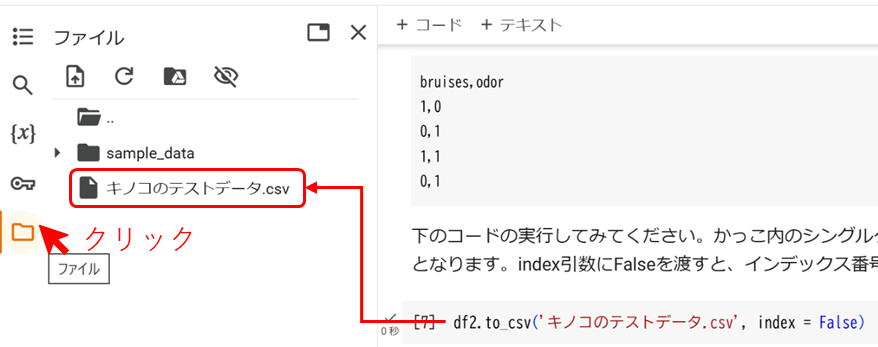

In [ ]:
df3 = pd.read_csv('キノコのテストデータ.csv')
df3

##0.4.モデルの構築と評価

次に、機械学習モデルの構築に使用する**機械学習ライブラリscikit-learn**をインポートします。インポート方法は、pandas時と同じですが、scikit-learnにはさまざまなモデルが存在するため、使用したいモデルが決まっていれば、そのモデルのインポートだけで十分です。なお、scikit-learnは、インポート時の名前は、sklearnです。今回の場合、`sklearn`の決定木関連`tree`中から分類用の決定木クラス（DecisionTreeClassifier）をインポートして使用します。その際の記載方法は以下のようになります。

>**[scikit-learnのtreeからDecisionTreeClassifierクラスをインポート]**
>
>```Python
>from sklearn.tree import DecisionTreeClassifier
>```

from ... import ...により、クラスだけを指定してインポートしたことで、クラス名の前にドットを付けずとも使用できるようになります。インポートしたクラス名にかっこを付けて変数に代入するだけで、モデルをインスタンス化できます。

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

この2行だけで分類タスク用の決定木のモデルを作成できました。あとは、データをこのモデルに学習させるだけで、予測モデルが完成します。それでは、決定木の説明で利用した毒キノコデータを利用したいと思います。下のコードセルを実行すると同じものが作成できます。

In [ ]:
import pandas as pd
test_data = pd.DataFrame([[5,4,'N'],[3,2,'N'],[6,2,'Y'],[2,1,'N'],[5,1,'Y']], columns = ['height', 'width','poison'])
test_data

それでは、この表から特徴量とラベルを分けて、機械学習モデルに学習させましょう。表から特定列を抜き出すには、データフレームの代入された`変数名[['列名1','列名2']]`とすると指定した列名の表を抜き出すことができます。[　]の中に文字列のリストを代入していることに注意しましょう。

In [ ]:
x = test_data[['height','width']]
x

ラベルの方も同様に抜き出しますが、ラベルは1列だけでよいので、リストではなく列名だけ角かっこの中に入れます。

In [ ]:
t = test_data['poison']
t

なお、1列だけ指定した場合は、DataFrameではなく、Seriesというクラスのオブジェクトが返されます。Seriesも、Pandasで値をまとめて管理できるクラスです。DataFrameは、行と列（indexとcolumns）からなる表データとして管理しますが、Seriesは、1列のみのデータで行をindexで管理するクラスです。indexは、DataFrameの時と同様に0から始まる連番が割り振られます。なお、次のコードを実行するとそれぞれのクラスが確認できます。

In [ ]:
print(type(x))
print(type(t))

なお、1列だけでもシリーズではなく、データフレームとして抽出したい場合は、1つの要素のリストを角かっこ[　]内に指定します。

In [ ]:
type(test_data[['poison']])

それでは、特徴量`x`とラベル`t`をモデルに渡して、学習させましょう。scikit-learnの機械学習モデルの学習にはfitメソッドを利用します。

In [ ]:
model.fit(x,t)

たった1行で学習が終了しました。正しく予測できるか確かめるためには、scoreメソッドで確かめられます。

In [ ]:
model.score(x,t)

1.0と表示されると100%の正解率ということです。無事学習に成功しました。これだけでは、実際にどう決定木が分類しているのかわかりにくいので、決定木の分類条件を見てみましょう。sklearnのさらにtreeの中にあるplot_tree関数は、決定木の分岐条件を視覚的に理解するのに便利な関数です。決定木クラスのimport同様plot_tree関数だけインポートし、引数にモデルを渡して、feature_namesにカラム名を渡して木の構造を表示してみましょう。

In [ ]:
from sklearn.tree import plot_tree
plot_tree(model, feature_names = x.columns)

この図からheight（高さ）列が4以下で最初に分類し、その後width（幅）が3以下で分類しているのが分かります。sampleとあるのがデータ数（表の行数）ですので、5個のデータが2と3個に分類され、その後、2個と1個に分類されているのが分かります。これは、最初の決定木の説明と同じ結果になっていることが分かります。

以上が機械学習の流れとなります。scikit-learnというライブラリを用いたことで機械学習が実質以下の3行で予測モデルが構築できました。

*   機械学習モデルのインポート
*   モデルのインスタンス化
*   データへのフィット

レベル０の学習内容は以上です。最後に復習もかねて演習問題にも取り組んでみてください。

##0.5.演習問題

レベル０では、データの特徴や前処理の仕方、決定木について学びました。レベル０の内容を踏まえて、下記の演習問題に取り組んでみてください。演習問題の解答・解説は、動画をご参照してください。

問0-1.下記の表をpandasのデータフレームで作成してみましょう。

|  | 斑点 | 匂い |毒|
|-----|------|------|--|
| 0 | Y | N   |N|
| 1 | N | Y   |Y|

問0-2.下記の表のように、問0-1で作成したデータフレームをダミー変数化で変更してみましょう。

|   | 斑点 | 匂い |毒|
|-----|------|------|--|
| 0 | 1 | 0   |0|
| 1 | 0 | 1   |1|

問0-3.上記の表データをCSVファイルとして、適当なファイル名（例：問0-2など）を付けて保存してみましょう。その後、ファイルが保存されているのを確認してみてください。なお、文字列にはシングルクオーテーションを使用するのを忘れないよう気を付けましょう。

問0-4.問0-2で作成したデータフレームから斑点と匂いの特徴量列を抽出し、下記のようにカラム名を英単語表記に変更してみましょう。

|| bruises | odor |
|------|------|--|
|0| 1 | 0|
|1| 0 | 1|